In the name of Allah,..

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# to display stats about data
#df.describe()

# to basic info about datatype
#df.info()

In [8]:
# to display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
# check for null values
df.isnull().sum()
# no null values in the dataframe

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

(4.295, 4.66]     9
(4.66, 5.02]     23
(5.02, 5.38]     14
(5.38, 5.74]     27
(5.74, 6.1]      22
(6.1, 6.46]      20
(6.46, 6.82]     18
(6.82, 7.18]      6
(7.18, 7.54]      5
(7.54, 7.9]       6
Name: SepalLengthCm, dtype: int64

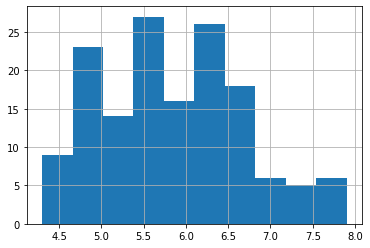

In [10]:
# histograms
df['SepalLengthCm'].hist() # like a bell curve

#abc = df['SepalLengthCm'].tolist()
#min(abc), max(abc)
df['SepalLengthCm'].value_counts(sort=False, bins=10)
  # middle two values of hist or v_c are not reliable

In [11]:
#df['SepalWidthCm'].hist()  # like a bell curve
#df['PetalLengthCm'].hist()
#df['PetalWidthCm'].hist()

#df['SepalWidthCm'].value_counts(sort=False, bins=10)

In [12]:
df.columns.tolist()

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [13]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

def sp(a,b):
  for i in range(3):
      x = df[df['Species'] == species[i]]
      plt.scatter(x[a], x[b], c = colors[i], label=species[i])
  plt.xlabel(a)
  plt.ylabel(b)
  plt.legend()

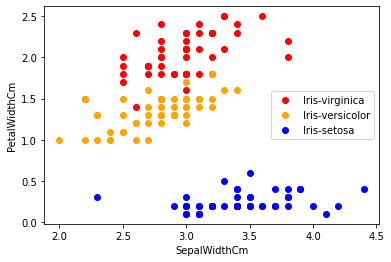

In [14]:
# We can plot 6 combinations, but author is satisfied with 4

#sp('SepalLengthCm', 'SepalWidthCm')
#sp('PetalLengthCm', 'PetalWidthCm') # I like this - author's best
#sp('SepalLengthCm', 'PetalLengthCm')
sp('SepalWidthCm', 'PetalWidthCm') # I like this - my best

##**Coorelation Matrix**

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [15]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


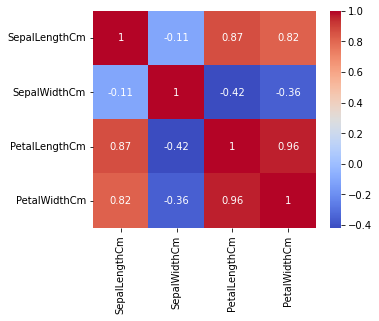

In [16]:
# better visualization
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
# Focus only on one part of the diagonal

In [17]:
'''
# Observations - High correlations out of 6 combinations:
1- Petal Width and Petal Length
2- Petal Length and Sepal Length
3- Petal Width and Sepal Length
'''

'\n# Observations - High correlations out of 6 combinations:\n1- Petal Width and Petal Length\n2- Petal Length and Sepal Length\n3- Petal Width and Sepal Length\n'

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head() # species changed to 0,1,2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###**Model Training**

In [66]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
# Yes!! Split takes the responsibility of shuffle also

In [67]:
x_train.head()
y_train.head()

77    1
76    1
13    0
60    1
1     0
Name: Species, dtype: int64

In [68]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# model training
model.fit(x_train, y_train)

# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

# model training
model.fit(x_train, y_train)

# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [70]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


In [71]:
import xgboost as xgb
model = xgb.XGBRegressor()

model.fit(x_train, y_train)

# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

[14:07:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy:  87.32129717646438


In [18]:
# Logistic regression and KNN both are good. Decision tree is fair.
# Sometimes regression works best, and sometimes KNN
# XGBoost is performing the worst. I think due to small dataset